3 Trace(s) in Stream:
... | 1970-01-01T00:00:05.950000Z - 1970-01-01T00:00:57.100000Z | 20.0 Hz, 1024 samples
... | 1970-01-01T00:00:05.950000Z - 1970-01-01T00:00:57.100000Z | 20.0 Hz, 1024 samples
... | 1970-01-01T00:00:05.950000Z - 1970-01-01T00:00:57.100000Z | 20.0 Hz, 1024 samples


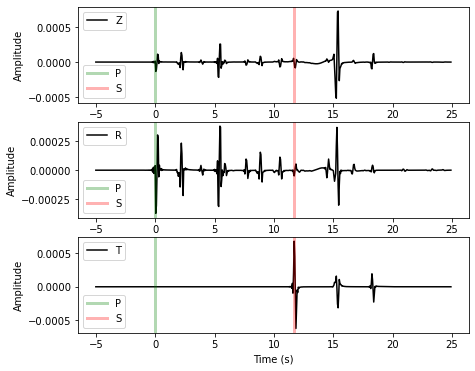

In [43]:
### Sythetics for sP waveforms using fk package
# * Stage-I: Use shell script synthetics_fk.sh to generate the synthetic waveforms

# ** Satge-II: Plot show the synthetic waveforms using obspy
from obspy import read
import matplotlib.pyplot as plt
import numpy as np

st = read("./Waveform/sP-100.z")
st += read("./Waveform/sP-100.r")
st += read("./Waveform/sP-100.t")
print(st)

tb = st[0].stats.sac.b
tp = st[0].stats.sac.t1
ts = st[0].stats.sac.t2
delta = st[0].stats.sac.delta
npts = int(30/delta)
bpoint = int((tp-5-tb)/delta)
time = np.arange(tp-5,tp-5+npts*delta,delta)

plt.subplots(figsize=(7, 6))
plt.subplot(3, 1, 1)
line1, = plt.plot(time-tp,st[0].data[bpoint:bpoint+npts], '-k', label="Z")
plt.ylabel('Amplitude')
plt.legend(loc="upper left")
first_legend = plt.legend(handles=[line1], loc='upper left')
plt.gca().add_artist(first_legend)
## Phase arrivals
line2 = plt.axvline(x=0, color='green', linewidth=3, alpha=0.3, label="P")
line3 = plt.axvline(x=ts-tp, color='red', linewidth=3, alpha=0.3, label="S")
plt.legend(handles=[line2,line3], loc='lower left')

plt.subplot(3, 1, 2)
line1, = plt.plot(time-tp,st[1].data[bpoint:bpoint+npts], '-k', label="R")
plt.ylabel('Amplitude')
plt.legend(loc="upper left")
first_legend = plt.legend(handles=[line1], loc='upper left')
plt.gca().add_artist(first_legend)
## Phase arrivals
line2 = plt.axvline(x=0, color='green', linewidth=3, alpha=0.3, label="P")
line3 = plt.axvline(x=ts-tp, color='red', linewidth=3, alpha=0.3, label="S")
plt.legend(handles=[line2,line3], loc='lower left')

plt.subplot(3, 1, 3)
line1, = plt.plot(time-tp,st[2].data[bpoint:bpoint+npts], '-k', label="T")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
first_legend = plt.legend(handles=[line1], loc='upper left')
plt.gca().add_artist(first_legend)
## Phase arrivals
line2 = plt.axvline(x=0, color='green', linewidth=3, alpha=0.3, label="P")
line3 = plt.axvline(x=ts-tp, color='red', linewidth=3, alpha=0.3, label="S")
plt.legend(handles=[line2,line3], loc='lower left')

plt.show()
